In [ ]:
#A
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
print("Input X:", X)
print("Target Y:", Y)

Input X: [0.5 2.5]
Target Y: [0.2 0.9]


In [ ]:
#B
import numpy as np
# Initialize weight and bias randomly
w = np.random.randn()
b = np.random.randn()
print(f"Initialized weight: {w:.4f}")
print(f"Initialized bias: {b:.4f}")

Initialized weight: -0.4695
Initialized bias: 0.5426


Predicted outputs: [ 0.30782285 -0.63112592]
Errors: [-0.10782285  1.53112592]
Sample 0: dw=0.1078, db=0.2156
Updated weight: -0.4803, Updated bias: 0.5210
Sample 1: dw=-7.6556, db=-3.0623
Updated weight: 0.2853, Updated bias: 0.8272
Loss after update: 0.5015


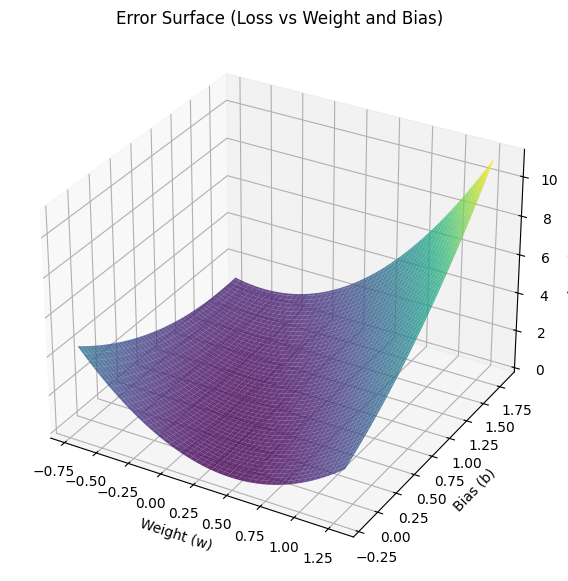

In [ ]:
#C
# Learning rate
lr = 0.1
# Step (c.i) - Calculate outputs and errors
y_preds = w * X + b
errors = Y - y_preds
print(f"Predicted outputs: {y_preds}")
print(f"Errors: {errors}")

# Step (c.ii) - Calculate gradients for each data point, update weights and bias
for i in range(len(X)):
  dw = -2 * X[i] * errors[i]
  db = -2 * errors[i]
  print(f"Sample {i}: dw={dw:.4f}, db={db:.4f}")
  # Update weights and biases
  w = w - lr * dw
  b = b - lr * db
  print(f"Updated weight: {w:.4f}, Updated bias: {b:.4f}")

# Step (c.iii) - Calculate loss after update
y_preds_updated = w * X + b
loss = np.mean((Y - y_preds_updated) ** 2)
print(f"Loss after update: {loss:.4f}")

# Step (c.iv) - Plot error surface (loss vs weight, bias)
w_vals = np.linspace(w - 1, w + 1, 100)
b_vals = np.linspace(b - 1, b + 1, 100)
W, B = np.meshgrid(w_vals, b_vals)
Loss = np.zeros_like(W)

for i in range(W.shape[0]):
  for j in range(W.shape[1]):
    preds = W[i, j] * X + B[i, j]
    Loss[i, j] = np.mean((Y - preds) ** 2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Loss, cmap='viridis', alpha=0.8)
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Error Surface (Loss vs Weight and Bias)')
plt.show()

Initial weight: 0.4967, Initial bias: -0.1383

--- Sample 0 ---
Prediction: 0.1101, Error: 0.0899
Gradient dw: -0.0899, db: -0.1798
Updated weight: 0.5057, Updated bias: -0.1203
Loss over all samples after update: 0.0320

--- Sample 1 ---
Prediction: 1.1440, Error: -0.2440
Gradient dw: 1.2199, db: 0.4880
Updated weight: 0.3837, Updated bias: -0.1691
Loss over all samples after update: 0.0217


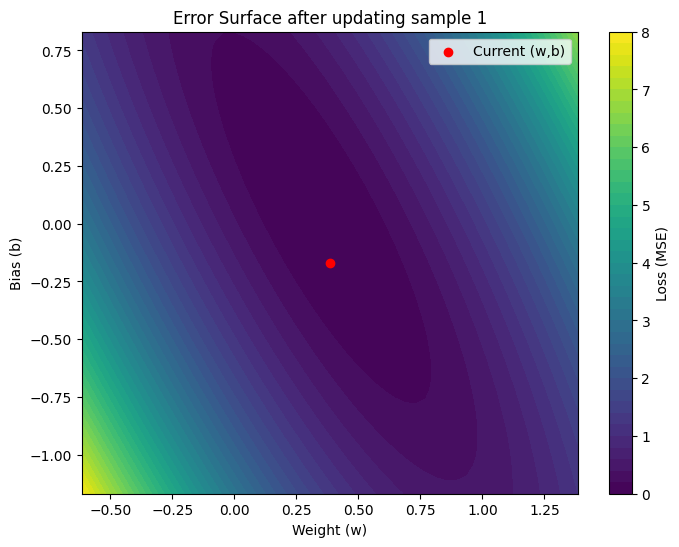

In [ ]:
#D
import numpy as np
import matplotlib.pyplot as plt
# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
# Initialize weights and bias randomly
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()
print(f"Initial weight: {w:.4f}, Initial bias: {b:.4f}")
lr = 0.1 # learning rate

for i in range(len(X)):
  print(f"\n--- Sample {i} ---")
  # Forward pass
  y_pred = w * X[i] + b
  error = Y[i] - y_pred
  print(f"Prediction: {y_pred:.4f}, Error: {error:.4f}")
  # Calculate gradients
  dw = -2 * X[i] * error
  db = -2 * error
  print(f"Gradient dw: {dw:.4f}, db: {db:.4f}")
  # Update weight and bias
  w = w - lr * dw
  b = b - lr * db
  print(f"Updated weight: {w:.4f}, Updated bias: {b:.4f}")
  # Calculate loss over full dataset with updated weights
  y_preds_all = w * X + b
  loss = np.mean((Y - y_preds_all) ** 2)
  print(f"Loss over all samples after update: {loss:.4f}")

# Plot error surface around current w and b
w_vals = np.linspace(w - 1, w + 1, 50)
b_vals = np.linspace(b - 1, b + 1, 50)
W, B = np.meshgrid(w_vals, b_vals)
Loss_surface = np.zeros_like(W)


for m in range(W.shape[0]):
  for n in range(W.shape[1]):
    preds = W[m, n] * X + B[m, n]
    Loss_surface[m, n] = np.mean((Y - preds) ** 2)
plt.figure(figsize=(8,6))
plt.contourf(W, B, Loss_surface, levels=50, cmap='viridis')
plt.colorbar(label='Loss (MSE)')
plt.scatter(w, b, color='red', label='Current (w,b)')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title(f'Error Surface after updating sample {i}')
plt.legend()
plt.show()


In [ ]:
#E
# Cell 5: Training loop for SGD and BGD
def forward(x, w, b):
    return w * x + b

def gradients(x, y_true, y_pred):
    # For MSE Loss: dL/dw = 2 * x * (y_pred - y_true)
    #               dL/db = 2 * (y_pred - y_true)
    dw = 2 * x * (y_pred - y_true)
    db = 2 * (y_pred - y_true)
    return dw, db

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def train_network(X, Y, w_init, b_init, epochs=20, lr=0.1, method='SGD'):
  w, b = w_init, b_init
  n = len(X)
  mse_history = []
  accuracy_history = []
  # For accuracy, define tolerance
  tolerance = 0.05
  for epoch in range(epochs):
    if method == 'SGD':
      # Update after each sample
      for i in range(n):
        y_pred = forward(X[i], w, b)
        dw, db = gradients(X[i], Y[i], y_pred)
        w -= lr * dw
        b -= lr * db
    elif method == 'BGD':
      # Compute gradients for all samples, then update once
      y_preds = forward(X, w, b)
      dw = 0
      db = 0
      for i in range(n):
        dwi, dbi = gradients(X[i], Y[i], y_preds[i])
        dw += dwi
        db += dbi
      dw /= n
      db /= n
      w -= lr * dw
      b -= lr * db
    # Calculate loss after epoch
    y_preds_epoch = forward(X, w, b)
    loss = mse_loss(Y, y_preds_epoch)
    mse_history.append(loss)
    # Calculate accuracy: percent of predictions within tolerance of true value
    acc = np.mean(np.abs(Y - y_preds_epoch) < tolerance)
    accuracy_history.append(acc)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}, Accuracy: {acc*100:.2f}%, w:{w:.4f}, b: {b:.4f}")
  return w, b, mse_history, accuracy_history

# Initialize weights again for a fresh start:
w_init, b_init = np.random.randn(), np.random.randn()
print(f"Fresh start - w: {w_init:.4f}, b: {b_init:.4f}")
# Run SGD for 20 epochs
w_sgd, b_sgd, mse_sgd, acc_sgd = train_network(X, Y, w_init, b_init, epochs=20, lr=0.1, method='SGD')
# Run BGD for 20 epochs
w_bgd, b_bgd, mse_bgd, acc_bgd = train_network(X, Y, w_init, b_init, epochs=20, lr=0.1, method='BGD')

Fresh start - w: 0.6477, b: 1.5230
Epoch 1/20 - Loss: 0.3848, Accuracy: 0.00%, w:-0.2676, b: 0.8934
Epoch 2/20 - Loss: 0.4374, Accuracy: 0.00%, w:0.1401, b: 0.9670
Epoch 3/20 - Loss: 0.1859, Accuracy: 50.00%, w:0.0361, b: 0.7914
Epoch 4/20 - Loss: 0.1820, Accuracy: 0.00%, w:0.1214, b: 0.7280
Epoch 5/20 - Loss: 0.1276, Accuracy: 0.00%, w:0.1292, b: 0.6370
Epoch 6/20 - Loss: 0.1044, Accuracy: 0.00%, w:0.1619, b: 0.5698
Epoch 7/20 - Loss: 0.0800, Accuracy: 0.00%, w:0.1810, b: 0.5053
Epoch 8/20 - Loss: 0.0631, Accuracy: 0.00%, w:0.2016, b: 0.4502
Epoch 9/20 - Loss: 0.0491, Accuracy: 50.00%, w:0.2184, b: 0.4008
Epoch 10/20 - Loss: 0.0385, Accuracy: 50.00%, w:0.2338, b: 0.3573
Epoch 11/20 - Loss: 0.0301, Accuracy: 50.00%, w:0.2472, b: 0.3188
Epoch 12/20 - Loss: 0.0235, Accuracy: 50.00%, w:0.2591, b: 0.2848
Epoch 13/20 - Loss: 0.0184, Accuracy: 50.00%, w:0.2696, b: 0.2547
Epoch 14/20 - Loss: 0.0144, Accuracy: 50.00%, w:0.2789, b: 0.2281
Epoch 15/20 - Loss: 0.0112, Accuracy: 50.00%, w:0.2872, 

In [ ]:
#F
# Initialize parameters
w_sgd = np.random.randn()
b_sgd = np.random.randn()
lr = 0.1
epochs = 20
for epoch in range(epochs):
  for i in range(len(X)):
    y_pred = w_sgd * X[i] + b_sgd
    error = Y[i] - y_pred
    # Gradients
    dw = -2 * X[i] * error
    db = -2 * error
    # Update
    w_sgd = w_sgd - lr * dw
    b_sgd = b_sgd - lr * db
  # Compute loss after each epoch
  y_preds = w_sgd * X + b_sgd
  loss = np.mean((Y - y_preds) ** 2)
  print(f"Epoch {epoch+1}/{epochs} - SGD Loss: {loss:.4f}, w: {w_sgd:.4f}, b:{b_sgd:.4f}")




Epoch 1/20 - SGD Loss: 0.2502, w: 0.5567, b:0.1704
Epoch 2/20 - SGD Loss: 0.0325, w: 0.2567, b:0.0106
Epoch 3/20 - SGD Loss: 0.0063, w: 0.3729, b:0.0668
Epoch 4/20 - SGD Loss: 0.0006, w: 0.3300, b:0.0412
Epoch 5/20 - SGD Loss: 0.0004, w: 0.3477, b:0.0472
Epoch 6/20 - SGD Loss: 0.0001, w: 0.3421, b:0.0416
Epoch 7/20 - SGD Loss: 0.0001, w: 0.3452, b:0.0409
Epoch 8/20 - SGD Loss: 0.0001, w: 0.3449, b:0.0386
Epoch 9/20 - SGD Loss: 0.0001, w: 0.3459, b:0.0372
Epoch 10/20 - SGD Loss: 0.0000, w: 0.3462, b:0.0357
Epoch 11/20 - SGD Loss: 0.0000, w: 0.3467, b:0.0345
Epoch 12/20 - SGD Loss: 0.0000, w: 0.3471, b:0.0334
Epoch 13/20 - SGD Loss: 0.0000, w: 0.3474, b:0.0324
Epoch 14/20 - SGD Loss: 0.0000, w: 0.3477, b:0.0316
Epoch 15/20 - SGD Loss: 0.0000, w: 0.3480, b:0.0308
Epoch 16/20 - SGD Loss: 0.0000, w: 0.3482, b:0.0301
Epoch 17/20 - SGD Loss: 0.0000, w: 0.3484, b:0.0295
Epoch 18/20 - SGD Loss: 0.0000, w: 0.3486, b:0.0290
Epoch 19/20 - SGD Loss: 0.0000, w: 0.3488, b:0.0285
Epoch 20/20 - SGD Los

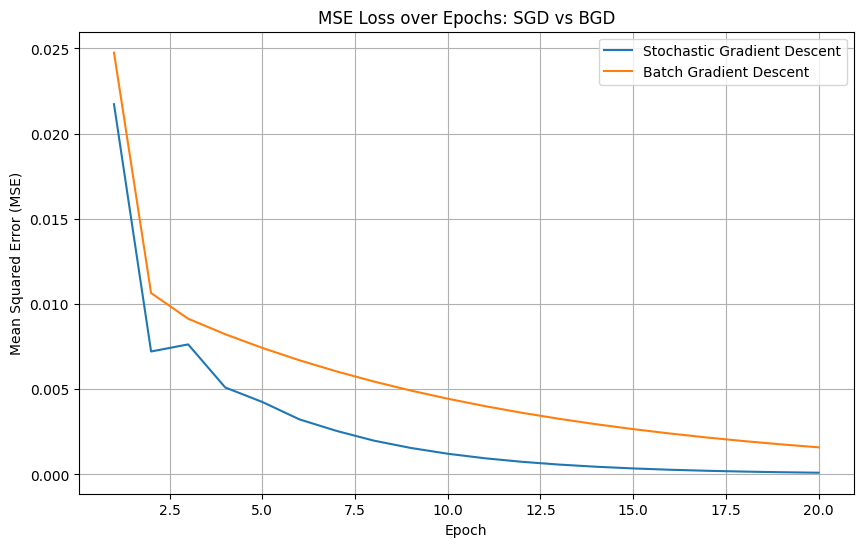

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Hyperparameters
lr = 0.1
epochs = 20

# Initialize weights and bias for SGD and BGD
np.random.seed(42)
w_sgd = np.random.randn()
b_sgd = np.random.randn()
w_bgd = w_sgd  # start from same initial weights
b_bgd = b_sgd

# Lists to store losses
losses_sgd = []
losses_bgd = []

# SGD Training
for epoch in range(epochs):
    for i in range(len(X)):
        y_pred = w_sgd * X[i] + b_sgd
        error = Y[i] - y_pred
        dw = -2 * X[i] * error
        db = -2 * error
        w_sgd -= lr * dw
        b_sgd -= lr * db
    # Calculate loss for whole dataset at end of epoch
    y_preds = w_sgd * X + b_sgd
    loss = np.mean((Y - y_preds) ** 2)
    losses_sgd.append(loss)

# BGD Training
for epoch in range(epochs):
    y_preds = w_bgd * X + b_bgd
    errors = Y - y_preds
    dw = -2 * np.sum(X * errors) / len(X)
    db = -2 * np.sum(errors) / len(X)
    w_bgd -= lr * dw
    b_bgd -= lr * db
    loss = np.mean(errors ** 2)
    losses_bgd.append(loss)

# Plotting the losses
plt.figure(figsize=(10,6))
plt.plot(range(1, epochs + 1), losses_sgd, label='Stochastic Gradient Descent')
plt.plot(range(1, epochs + 1), losses_bgd, label='Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Loss over Epochs: SGD vs BGD')
plt.legend()
plt.grid(True)
plt.show()


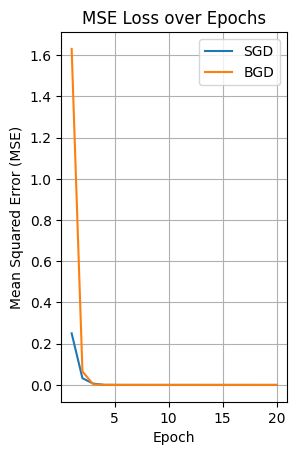

In [ ]:
#H
import numpy as np
import matplotlib.pyplot as plt
# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])
# Hyperparameters
lr = 0.1
epochs = 20
epsilon = 0.1 # threshold for "correct" prediction
# Initialize weights and bias for SGD and BGD np.random.seed(42)
w_sgd = np.random.randn()
b_sgd = np.random.randn()
w_bgd = w_sgd # start from same initial weights
b_bgd = b_sgd

# Lists to store losses and accuracies
losses_sgd = []
accuracies_sgd = []
losses_bgd = []
accuracies_bgd = []

# SGD Training
for epoch in range(epochs):
  for i in range(len(X)):
    y_pred = w_sgd * X[i] + b_sgd
    error = Y[i] - y_pred
    dw = -2 * X[i] * error
    db = -2 * error
    w_sgd -= lr * dw
    b_sgd -= lr * db
  # Calculate predictions and loss on full dataset
  y_preds = w_sgd * X + b_sgd
  loss = np.mean((Y - y_preds) ** 2)
  losses_sgd.append(loss)
  # Calculate accuracy
  correct = np.abs(Y - y_preds) <= epsilon
  accuracy = np.mean(correct) * 100 # percentage
  accuracies_sgd.append(accuracy)

# BGD Training
for epoch in range(epochs):
  y_preds = w_bgd * X + b_bgd
  errors = Y - y_preds
  dw = -2 * np.sum(X * errors) / len(X)
  db = -2 * np.sum(errors) / len(X)
  w_bgd -= lr * dw
  b_bgd -= lr * db
  loss = np.mean(errors ** 2)
  losses_bgd.append(loss)
  correct = np.abs(Y - y_preds) <= epsilon
  accuracy = np.mean(correct) * 100
  accuracies_bgd.append(accuracy)

# Plotting Loss plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, epochs + 1), losses_sgd, label='SGD')
plt.plot(range(1, epochs + 1), losses_bgd, label='BGD')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Loss over Epochs')
plt.legend()
plt.grid(True)



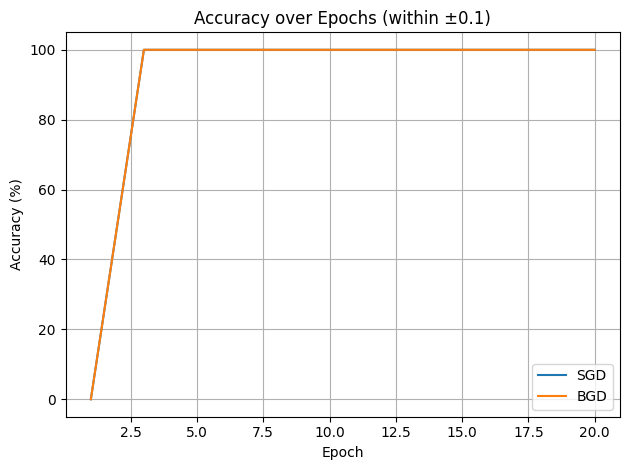

In [ ]:
# Plotting Accuracy plt.subplot(1,2,2)
plt.plot(range(1, epochs + 1), accuracies_sgd, label='SGD')
plt.plot(range(1, epochs + 1), accuracies_bgd, label='BGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title(f'Accuracy over Epochs (within ±{epsilon})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()